In [7]:
import spacy
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from xml.etree import cElementTree as ET
import re
import json
from collections import Counter
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from analysis_code.analyze_corpus import *

In [8]:
directory = '/home/luluvyd/corpus/gutenberg-break/'

In [3]:
nlp = spacy.load('en_core_web_md')
emos = loadEmotionWords('/home/luluvyd/corpus/NRC-Emotion-Lexicon-v0.92/Generated-EmotionWords.txt')

i : 0
i : 1
i : 2
i : 3
i : 4
i : 5
i : 6
i : 7
i : 8
i : 9
i : 10
i : 11
i : 12
i : 13
i : 14
i : 15
i : 16
i : 17
i : 18
i : 19
i : 20
i : 21
i : 22
i : 23
i : 24
i : 25
i : 26
i : 27
i : 28
i : 29
i : 30
i : 31
i : 32
i : 33
i : 34
i : 35
i : 36
i : 37
i : 38
i : 39
i : 40
i : 41
i : 42
i : 43
i : 74
i : 75
i : 76
i : 77
i : 78
i : 79
i : 80
i : 81
i : 82
i : 83
i : 84
i : 85
i : 86
i : 87
i : 88
i : 89
i : 90
i : 91
i : 92
i : 93
i : 94
i : 95
i : 96
i : 97
i : 98
i : 99
i : 100
i : 101
i : 102
i : 103
i : 104
i : 105
i : 106
i : 107
i : 108
i : 109
i : 110
i : 111
i : 112
i : 113
i : 114
i : 115
i : 116
i : 117
i : 118
i : 119
i : 120
i : 121
i : 122
i : 123
i : 124
i : 125
i : 126
i : 127
i : 128
i : 129
i : 130
i : 131
i : 132
i : 133
i : 134
i : 135
i : 136
i : 137
i : 138
i : 139
i : 140
i : 141
i : 142
i : 143
i : 144
i : 145
i : 146
i : 147
i : 148
i : 149
i : 150
i : 151
i : 152
i : 153
i : 154
i : 155
i : 156
i : 157
i : 158
i : 159
i : 160
i : 161
i : 162
i : 163
i : 164


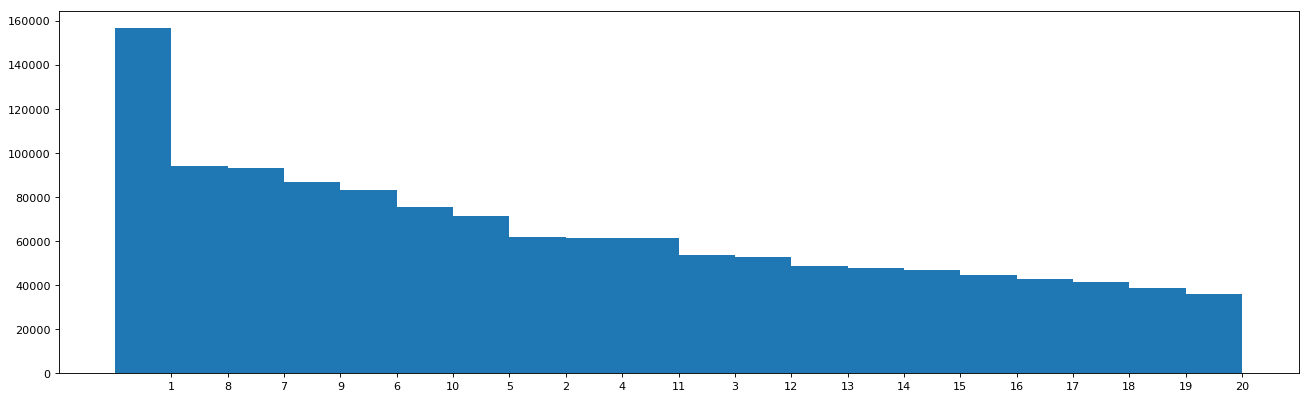

In [ ]:
'''
Sentence length histogram
error: doc input string cannot succeed 1 million characters
problem: non-edited opinion text can have long and publish unaccepted sentence structures
'''
read_files = glob.glob(directory + '*.txt')

counter = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counter += analyzeSentence(doc) 
        i += 1
        
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counter)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
directory = '/home/luluvyd/corpus/gutenberg-break/part-1/'

In [ ]:
'''
Punctuation histogram
'''

# read_files = glob.glob("/home/luluvyd/corpus/aclImdb/train/pos/*.txt")
read_files = glob.glob(directory + '*.txt')

counter = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counter += analyzePunctuation(doc) 
        i += 1
        
        
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counter)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
'''
Pronoun histogram
error: doc input string cannot succeed 1 million characters
problem: non-edited opinion text can have long and publish unaccepted sentence structures
'''

# read_files = glob.glob("/home/luluvyd/corpus/aclImdb/train/pos/*.txt")
read_files = glob.glob(directory + '*.txt')

counter = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counter += analyzePronounCategories(doc) 
        i += 1
        
        
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counter)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
'''
Verb histogram
error: doc input string cannot succeed 1 million characters
problem: non-edited opinion text can have long and publish unaccepted sentence structures
'''

# read_files = glob.glob("/home/luluvyd/corpus/aclImdb/train/pos/*.txt")
read_files = glob.glob(directory + '*.txt')

counter = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counter += analyzeVerb(doc) 
        i += 1
        
        
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counter)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
'''
Verb histogram
error: doc input string cannot succeed 1 million characters
problem: non-edited opinion text can have long and publish unaccepted sentence structures
'''

# read_files = glob.glob("/home/luluvyd/corpus/aclImdb/train/pos/*.txt")
read_files = glob.glob(directory + '*.txt')

counter = Counter('')
i = 0

for infile in read_files:
    print('i : ' + str(i))
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        counter += analyzeVerb(doc) 
        i += 1
        
        
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(counter)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

In [ ]:
'''
Verb category histogram
'''
read_files = glob.glob(directory + '*.txt')

CounterAct = Counter('')
CounterLink = Counter('')
CounterHelp = Counter('')
CounterHM = Counter('')
i = 0

for infile in read_files:
    with open(infile, 'r', errors='replace') as f:
        text = f.read()
        doc = nlp(text)
        a, b, c, d = analyzeVerbs(doc) 
        CounterAct += a
        CounterLink += b
        CounterHelp += c
        CounterHM += d
        print('i : ' + str(i))  
        i += 1
    
plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(CounterAct)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(CounterLink)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()

plt.figure(num=None, figsize=(20, 6), dpi=80, facecolor='w', edgecolor='k')
labels, values = rankCounter(CounterHelp)
indexes = np.arange(len(labels))
width = 1
plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.show()